In [33]:
# import libary
import tensorflow as tf
tf.set_random_seed(6789)
import numpy as np
import matplotlib.pyplot as plt
import sys 

In [26]:
N=100000
sig2=0.2
x=np.sign(np.random.normal(0.,1.,[N,1]))
y=x+np.random.normal(0.,np.sqrt(sig2),[N,1])
p_y_x=np.exp(-(y-x)**2/(2*sig2))
p_y_x_minus=np.exp(-(y+1)**2/(2*sig2))
p_y_x_plus=np.exp(-(y-1)**2/(2*sig2))
mi=np.average(np.log(p_y_x/(0.5*p_y_x_minus+0.5*p_y_x_plus)))
print(mi)

0.6592202048562272


In [17]:
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])
y_ = tf.placeholder(tf.float32, [None,1])
 
n_hidden=10
 
Wx=tf.Variable(tf.random_normal(stddev=0.1,shape=[1,n_hidden]))
Wy=tf.Variable(tf.random_normal(stddev=0.1,shape=[1,n_hidden]))
b=tf.Variable(tf.constant(0.1,shape=[n_hidden]))
 
hidden_joint=tf.nn.relu(tf.matmul(x,Wx)+tf.matmul(y,Wy)+b)
hidden_marg=tf.nn.relu(tf.matmul(x,Wx)+tf.matmul(y_,Wy)+b)
 
Wout=tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden,1]))
bout=tf.Variable(tf.constant(0.1,shape=[1]))
 
out_joint=tf.matmul(hidden_joint,Wout)+bout
out_marg=tf.matmul(hidden_marg,Wout)+bout
 
lower_bound=tf.reduce_mean(out_joint)-tf.log(tf.reduce_mean(tf.exp(out_marg)))
 
train_step = tf.train.AdamOptimizer(0.005).minimize(-lower_bound)

values = []
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for i in range(1000):
    x_sample=np.sign(np.random.normal(0.,1.,[N,1]))#np.random.normal(0.,1.,[N,1])
    y_sample=x_sample+np.random.normal(0.,np.sqrt(sig2),[N,1])
    y_shuffle=np.random.permutation(y_sample)
    number,_ = sess.run([lower_bound,train_step], feed_dict={x:x_sample,y:y_sample,y_:y_shuffle})
    values.append(number)

/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [18]:
print(len(values))

1000


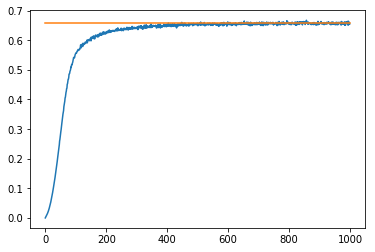

In [27]:
plt.plot(values)
plt.plot(np.ones_like(values)*mi)
plt.show()

In [37]:
# with two guassian
N=100000
sig1 = 0.2
sig2 = 0.3
mi = 0.5 * np.log(1+sig1/ sig2)
print(mi)

0.25541281188299536


In [ ]:
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])
y_ = tf.placeholder(tf.float32, [None,1])
 
n_hidden=10
 
Wx=tf.Variable(tf.random_normal(stddev=0.1,shape=[1,n_hidden]))
Wy=tf.Variable(tf.random_normal(stddev=0.1,shape=[1,n_hidden]))
b=tf.Variable(tf.constant(0.1,shape=[n_hidden]))
 
hidden_joint=tf.nn.relu(tf.matmul(x,Wx)+tf.matmul(y,Wy)+b)
hidden_marg=tf.nn.relu(tf.matmul(x,Wx)+tf.matmul(y_,Wy)+b)
 
Wout=tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden,1]))
bout=tf.Variable(tf.constant(0.1,shape=[1]))
 
out_joint=tf.matmul(hidden_joint,Wout)+bout
out_marg=tf.matmul(hidden_marg,Wout)+bout
 
lower_bound=tf.reduce_mean(out_joint)-tf.log(tf.reduce_mean(tf.exp(out_marg)))
 
train_step = tf.train.AdamOptimizer(0.005).minimize(-lower_bound)

values = []
# sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for i in range(1000):
    x_sample  = np.random.normal(0.,sig1,[N,1])
    y_sample  = np.random.normal(0.,sig2,[N,1])
    y_shuffle = np.random.permutation(y_sample)
    number,_  = sess.run([lower_bound,train_step], feed_dict={x:x_sample,y:y_sample,y_:y_shuffle})
    sys.stdout.write("\r" + str(number))
    sys.stdout.flush()
    values.append(number)

1.2516975e-0684

In [ ]:
plt.plot(values)
plt.plot(np.ones_like(values)*mi)
plt.show()

In [ ]:
! git all-go